In [1]:
# *******************loading the Dataset***************
# step1: 
# This  step am get Dataset from my computer 


from sklearn.datasets import load_svmlight_file
X,y = load_svmlight_file("C:/ABAS/DATA/australian_scale.txt",n_features=14) # 
X = X.toarray()

In [2]:
# Step2 : ***************   Devided The Dataset into Traning set and Validation Set   **********
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.31, random_state=42)

In [3]:
# importing nump library
import numpy as nupy
n_samples_train,n_featues_train = X_train.shape
X_train = nupy.concatenate((X_train,nupy.ones(shape=(n_samples_train,1))),axis=1)
y_train = y_train.reshape((n_samples_train,1))
n_samples_val,n_featues_val = X_val.shape
X_val = nupy.concatenate((X_val,nupy.ones(shape=(n_samples_val,1))),axis=1)
y_val = y_val.reshape((n_samples_val,1))

In [4]:
max_epoch = 100 # No.training epoch= 100
learning_rate = 0.001  
C = 0.5
losses_train = []
losses_val = []
W = nupy.random.random(size=(n_featues_train+1,1))

In [6]:
#Training Datat

for epoch in range(max_epoch):#  This function epoch  division of  time less than a period for trainig data
    h = 1- y_train*nupy.dot(X_train,W)
    tmp = nupy.where(h>0,y_train,0)
    W = W - learning_rate * (W - C * nupy.dot(X_train.transpose(),tmp)) # Update Weight

    y_predict_train = nupy.where(nupy.dot(X_train,W) > 0,1,-1)
    loss_train = nupy.sum(W * W) + C * nupy.sum(nupy.maximum(1 - y_train * nupy.dot(X_train, W), 0))
    losses_train.append(loss_train / n_samples_train)

    y_predict_val = nupy.where(nupy.dot(X_val, W) > 0, 1, -1)
    loss_val = nupy.sum(W * W) + C * nupy.sum(nupy.maximum(1 - y_val * nupy.dot(X_val, W), 0))
    losses_val.append(loss_val / n_samples_val)
    if (epoch % 10 == 0):  #trainig each 10 iteam   
        print("epoch={},acc_train={:.6f},acc_val={:.6f}".format(epoch,
                                                                nupy.average(y_train == y_predict_train),
                                                                nupy.average(y_val == y_predict_val)))

epoch=0,acc_train=0.794118,acc_val=0.799065
epoch=10,acc_train=0.859244,acc_val=0.883178
epoch=20,acc_train=0.855042,acc_val=0.878505
epoch=30,acc_train=0.861345,acc_val=0.859813
epoch=40,acc_train=0.852941,acc_val=0.869159
epoch=50,acc_train=0.852941,acc_val=0.864486
epoch=60,acc_train=0.852941,acc_val=0.864486
epoch=70,acc_train=0.852941,acc_val=0.859813
epoch=80,acc_train=0.855042,acc_val=0.859813
epoch=90,acc_train=0.855042,acc_val=0.859813


In [54]:
#  Build a text report showing the main classification metrics
from sklearn.metrics import classification_report 
#Note that in binary classification, recall of the positive class is also known as “sensitivity”;recall of the negative class is “specificity

# *************************** print report ***************************************************
print(classification_report(y_val,nupy.where(nupy.dot(X_val, W) > 0, 1, -1),
                            target_names = [' Class 0 ','Class 1'],digits=3))

             precision    recall  f1-score   support

   Class 0       0.948     0.838     0.890       130
    Class 1      0.788     0.929     0.852        84

avg / total      0.885     0.874     0.875       214



************************************************************* 
This Result Experiment 2 Linear Classification and Gradient Descent 
************************************************************* 


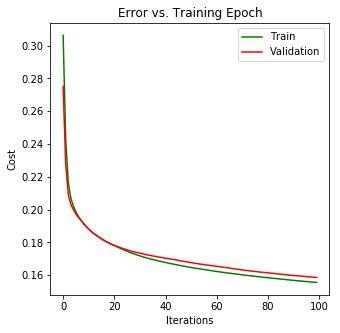

In [9]:

# This Drawing Graph of L_train  as well as L_validation with the Number of iterations

import matplotlib.pyplot as PLO  # Import this fuction to draw graph

PLO.figure(figsize=(5,5))
PLO.plot(losses_train,color="G",label="Train")
PLO.plot(losses_val,color="R",label="Validation")
PLO.legend()
PLO.xlabel("Iterations")
PLO.ylabel("Cost")
print("************************************************************* ")
print("This Result Experiment 2 Linear Classification and Gradient Descent ")
print("************************************************************* ")
PLO.title("Error vs. Training Epoch")
PLO.show()